In [ ]:
%pip install -q transformers

In [ ]:
import torch
from torch.utils.data import Dataset, random_split
from transformers import Trainer, TrainingArguments, GPTNeoForCausalLM, GPT2Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_file(file_path):
    with open(file_path) as f:
        lines = [line for line in f]
    return lines

In [ ]:
file_path = "drive/MyDrive/swift_lyrics.txt"

import nltk
nltk.download('punkt')

texts = read_file(file_path)

punct = '.();'

_data = []

for i in range(len(texts)):
  chars = [char for char in texts[i] if char not in punct]
  word = ''.join(chars)
  _data.append(word)

_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["I'm walking fast through the traffic lights \n",
 'Busy streets and busy lives \n',
 'And all we know is touch and go \n',
 'We are alone with our changing minds \n',
 'We fall in love till it hurts or bleeds,or fades in time \n',
 'And I never saw you coming \n',
 "And I'll never be the same \n",
 'You come around and the armor falls \n',
 'Pierce the room like a cannon ball \n',
 "Now all we know,is don't let go \n",
 'We are alone just you and me \n',
 'Up in your room and our slates are clean \n',
 'Just twin fire signs,four blue eyes \n',
 'So you were never a saint \n',
 "And I've loved in shades of wrong \n",
 'We learn to live with the pain \n',
 'Mosaic broken hearts \n',
 'But this love is brave and wild \n',
 'And I never saw you coming \n',
 "And I'll never be the same \n",
 'This is a state of grace \n',
 'This is the worthwhile fight \n',
 'Love is a ruthless game \n',
 'Unless you play it good and right \n',
 'These are the hands of fate \n',
 "You're my Achilles heel 

In [ ]:
def remove_text(indexes):
  for index in indexes:
    _data.pop(index)

indexes = [115, 349, 350, 351, 418, 436, 105, 328, 330, 341, 344, 362, 364, 933, 934, 935, 2754, 2758, 5610, 5812,
           5849, 5893, 5982, 5995, 6014, 6023, 6027, 6081, 6995, 7086, 7105]

remove_text(indexes)

_data

["I'm walking fast through the traffic lights \n",
 'Busy streets and busy lives \n',
 'And all we know is touch and go \n',
 'We are alone with our changing minds \n',
 'We fall in love till it hurts or bleeds,or fades in time \n',
 'And I never saw you coming \n',
 "And I'll never be the same \n",
 'You come around and the armor falls \n',
 'Pierce the room like a cannon ball \n',
 "Now all we know,is don't let go \n",
 'We are alone just you and me \n',
 'Up in your room and our slates are clean \n',
 'Just twin fire signs,four blue eyes \n',
 'So you were never a saint \n',
 "And I've loved in shades of wrong \n",
 'We learn to live with the pain \n',
 'Mosaic broken hearts \n',
 'But this love is brave and wild \n',
 'And I never saw you coming \n',
 "And I'll never be the same \n",
 'This is a state of grace \n',
 'This is the worthwhile fight \n',
 'Love is a ruthless game \n',
 'Unless you play it good and right \n',
 'These are the hands of fate \n',
 "You're my Achilles heel 

In [ ]:
data = []
for i in range(0, len(_data) - 4, 4):
  lyric = '{}, {}, {}, {}'.format(_data[i].strip(), _data[i+1].strip(),
                              _data[i+2].strip(), _data[i+3])
  data.append(lyric)

data

["I'm walking fast through the traffic lights, Busy streets and busy lives, And all we know is touch and go, We are alone with our changing minds \n",
 "We fall in love till it hurts or bleeds,or fades in time, And I never saw you coming, And I'll never be the same, You come around and the armor falls \n",
 "Pierce the room like a cannon ball, Now all we know,is don't let go, We are alone just you and me, Up in your room and our slates are clean \n",
 "Just twin fire signs,four blue eyes, So you were never a saint, And I've loved in shades of wrong, We learn to live with the pain \n",
 "Mosaic broken hearts, But this love is brave and wild, And I never saw you coming, And I'll never be the same \n",
 'This is a state of grace, This is the worthwhile fight, Love is a ruthless game, Unless you play it good and right \n',
 "These are the hands of fate, You're my Achilles heel, This is the golden age of something good, And right and real \n",
 "And I never saw you coming, And I'll never be

In [ ]:
nonsense_sentences = ['We were in the backseat, Drunk on something stronger than the drinks in the bar', '"I rent\u2005a\u2005place on Cornelia\u2005Street", I said casually in the car, I said casually in the car \n', "Heartbreakers gonna break,break,break,break,break (mmhm), And the fakers gonna fake,fake,fake,fake,fake (fake n' fake n' fake), Baby, I'm just gonna shake,shake,shake,shake,shake \n",'Got out some popcorn as soon as my rep started going down,down,down, Laughed on the school yard as soon as I tripped, And hit the ground,ground,ground', "I'd be the man, What's it like to brag about raking in dollars, And getting ****** and models? \n", 'When you said you needed space ?what<U+203D>, Then you come around again and say, "Baby,I miss you and I swear I\'m gonna change; trust me" \n', "She's like,揙h my God? but I'm just gonna shake, And to the fella over there with the hella good hair, Won't you come on over,baby,we can shake,shake,shake \n", "I'd be the man, What's it like to brag about raking in dollars, And getting ****** and models? \n", 'Drunk on something stronger than the drinks in the bar, "I rent\u2005a\u2005place on Cornelia\u2005Street", I said casually in the car \n', "And getting ****** and models?, And it's so good if you're bad, And it's okay if you're mad \n", "If I was out flashing my dollars,I'd be a b**ch not a baller, They paint me out to be bad, So,it's okay that I'm mad \n", 'When you said you needed space ?what<U+203D>, Then you come around again and say, "Baby,I miss you and I swear I\'m gonna change; trust me" \n',"And it's so good if you're bad, And it's okay if you're mad, If I was out flashing my dollars,I'd be a b**ch not a baller \n", 'Trouble,trouble,trouble, Oh,oh, Oh,oh \n', 'Just you and me, (e-he-e-he-e-he-e-he-e-he-e-he-e-he-e-he), (e-he-e-he-e-he-e-he-e-he-e-he-e-he-e-he) \n', 'I knew, Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh, Oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh \n', 'Oh oh, Oh yeah, Oh yeah \n','La la la la la la la la la la, La la la la la la la la la la, La la la la la la \n', 'When you said you needed space ?what<U+203D>, Then you come around again and say, "Baby,I miss you and I swear I\'m gonna change trust me', 'We?oohoohoohoohooh,oohoohoohoohooh, We?oohoohoohoohooh,oohoohoohoohooh, You go talk to your friends,talk to my friends,talk to me talk to me \n' ]

new_data = [sentence for sentence in data if sentence not in nonsense_sentences]

new_data

["I'm walking fast through the traffic lights, Busy streets and busy lives, And all we know is touch and go, We are alone with our changing minds \n",
 "We fall in love till it hurts or bleeds,or fades in time, And I never saw you coming, And I'll never be the same, You come around and the armor falls \n",
 "Pierce the room like a cannon ball, Now all we know,is don't let go, We are alone just you and me, Up in your room and our slates are clean \n",
 "Just twin fire signs,four blue eyes, So you were never a saint, And I've loved in shades of wrong, We learn to live with the pain \n",
 "Mosaic broken hearts, But this love is brave and wild, And I never saw you coming, And I'll never be the same \n",
 'This is a state of grace, This is the worthwhile fight, Love is a ruthless game, Unless you play it good and right \n',
 "These are the hands of fate, You're my Achilles heel, This is the golden age of something good, And right and real \n",
 "And I never saw you coming, And I'll never be

In [ ]:
for i in range (len(new_data)):
  new_data[i] = new_data[i].replace(",",", ")

for i in range (len(new_data)):
  new_data[i] = new_data[i].replace(",  ",", ")
#filter out lalala stuff

for i in range (len(new_data)):
  new_data[i] = new_data[i].replace(",,",",")

for i in range (len(new_data)):
  new_data[i] = new_data[i].replace("  "," ")


new_data

["I'm walking fast through the traffic lights, Busy streets and busy lives, And all we know is touch and go, We are alone with our changing minds \n",
 "We fall in love till it hurts or bleeds, or fades in time, And I never saw you coming, And I'll never be the same, You come around and the armor falls \n",
 "Pierce the room like a cannon ball, Now all we know, is don't let go, We are alone just you and me, Up in your room and our slates are clean \n",
 "Just twin fire signs, four blue eyes, So you were never a saint, And I've loved in shades of wrong, We learn to live with the pain \n",
 "Mosaic broken hearts, But this love is brave and wild, And I never saw you coming, And I'll never be the same \n",
 'This is a state of grace, This is the worthwhile fight, Love is a ruthless game, Unless you play it good and right \n',
 "These are the hands of fate, You're my Achilles heel, This is the golden age of something good, And right and real \n",
 "And I never saw you coming, And I'll never

In [ ]:
sentence_freq = []
empty_list = []
for sentence in new_data:
  empty_list = nltk.word_tokenize(sentence)
  sentence_freq.append(len(empty_list))

print (max(sentence_freq))


72


In [ ]:
sentence_freq

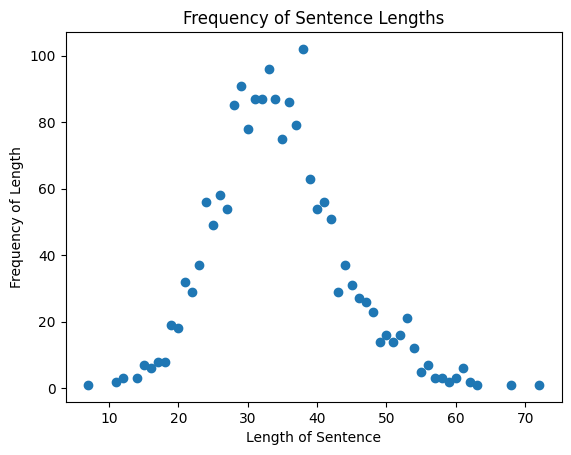

In [ ]:
max_sentence_len = 55

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

count = Counter(sentence_freq)

values = count.most_common()

X = []
Y = []

for value in values:
  X.append(value[0])
  Y.append(value[1])


plt.scatter(X, Y)
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency of Length')
plt.title('Frequency of Sentence Lengths')
plt.show()



# labels = df['O'].value_counts()
# df.plot(kind='bar')


In [ ]:
# around lengths 15-30
# try to get around a difference of 5
# 23-28 is pretty good
good_lengths = [32, 33, 34, 35]

cleaned_data = [text for text in new_data if len(nltk.word_tokenize(text)) in good_lengths]

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace(", I-I-I","")

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace(", mmm","")

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace(", mm","")

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace(" Oh!","")

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace("Oh-oh-oh!, ","")

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace("...","")
  cleaned_data[i] = cleaned_data[i].replace("I-I","")

for i in range (len(cleaned_data)):
  cleaned_data[i] = cleaned_data[i].replace(", , ",", ")

to_remove = ["Use my best colors for your portrait, Lay the table with the fancy shit, And watch you tolerate it, If it's all in my head tell me now \n",
             "I wait by the door like I'm just a kid, Use my best colors for your portrait, Lay the table with the fancy shit, And watch you tolerate it \n",
              "I'm doing good, I'm on some new shit, Been saying “yes” instead of “no”, I thought I saw you at the bus stop \n",
             'La la la la la la la la la la, La la la la la la la la la la, La la la la la la, Your very first day \n',
             "e-he-e-he-e-he-e-he-e-he-e-he-e-he-e-he, This is the last time I'm asking you this, Put my name at the top of your list, This is the last time I'm asking you why \n",
             'Ha-ah-ah, ha-ah-ah, ha-ah-ah-ah, Only bought this dress so you could take it off, Ha-ah-ah, ha-ah-ah, ha-ah-ah-ah, Only bought this dress so you could take it off \n',
             'And I pulled your body into mine, Every godd**n night now I get fake niceties, No one teaches you what to do, When a good man hurts you \n',
             "And d**n Dorothea they all wanna be ya, But are you still the same soul, I met under the bleachers well, Ooh I guess I'll never know \n",
             "He wants what's only yours, Oh godd**n, My pain fits in the palm of your freezing hand, Taking mine but it's been promised to another \n",
             "And now I'm covered in you, And I'm covered in you, So yeah it's a fire, It's a godd**n blaze in the dark \n",
             "And I know I'll pay for it, And the skeletons in both our closets, Plotted hard to f**k this up, And the old men that I've swindled \n",
             'Would you want me?, Would you tell me to go f**k myself, Or lead me to the garden?, In the garden would you trust me \n',
             'Ha, ah, ah, All of this silence and patience, pining and desperately waiting, My hands are shaking from all this, Ah, ha, ha, ha-ah \n',
             'I\'d never walk Cornelia Street againI don\'t wanna lose you, Yeah, "I rent\u2005a\u2005place on Cornelia\u2005Street", I said casually in the car \n']

cleaned_data = [data for data in cleaned_data if data not in to_remove]

cleaned_data[-1] = "And now you ask about you and I, There's no you and I, Remember what you put me through, I had to wake up and smell the break up \n"

len(cleaned_data)

330

In [ ]:
# Custome dataset class to load dataset
class TaylorSwift(Dataset):
    def __init__(self, txt_list, tokenizer, max_length):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for txt in txt_list:
            # Encode the descriptions using the GPT-Neo tokenizer
            encodings_dict = tokenizer('<|startoftext|>'
                                        + txt +
                                        '<|endoftext|>',
                                        truncation=True,
                                        max_length=max_length,
                                            padding="max_length")
            input_ids = torch.tensor(encodings_dict['input_ids'])
            self.input_ids.append(input_ids)
            mask = torch.tensor(encodings_dict['attention_mask'])
            self.attn_masks.append(mask)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [ ]:
# Set the random seed to a fixed value to get reproducible results
torch.manual_seed(42)

# Download the pre-trained GPT-Neo model's tokenizer
# Add the custom tokens denoting the beginning and the end
# of the sequence and a special token for padding
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-125M",
                            bos_token='<|startoftext|>',
                            eos_token='<|endoftext|>',
                            pad_token='<|pad|>')

# Download the pre-trained GPT-Neo model
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-125M").cuda()

# Resize the token embeddings because we've just added 3 new tokens
model.resize_token_embeddings(len(tokenizer))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Embedding(50259, 768)

In [ ]:
real_data = [text for text in cleaned_data if len(tokenizer.encode(text)) <= 45]

max_length = max([len(tokenizer.encode(text)) for text in real_data])
# Load dataset
dataset = TaylorSwift(real_data, tokenizer, max_length)

# Split data into train/val
train_size = int(0.9 * len(dataset))

train_data, val_data = random_split(dataset, [train_size, len(dataset) - train_size])

len(real_data)

329

In [ ]:
tokenizer.batch_decode(val_data[0])

["<|startoftext|> This is our place, we make the call, And I'm highly suspicious, That everyone who sees you wants you, I've loved you three summers now, honey \n<|endoftext|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|>",
 '"""""""""""""""""""""""""""""""""""""!!!!!!']

In [ ]:
# Here I will pass the output directory where
# the model predictions and checkpoints will be stored,
# batch sizes for the training and validation steps,
# and warmup_steps to gradually increase the learning rate
%pip uninstall -y transformers accelerate
%pip install transformers accelerate

learning_rate = 5e-5


training_args = TrainingArguments(output_dir=f'./results_{learning_rate}',
                                  num_train_epochs= 20,
                                  logging_steps=100,
                                  save_steps=100,
                                  evaluation_strategy='steps',
                                  eval_steps=100,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  warmup_steps=100,
                                  learning_rate=learning_rate,
                                  weight_decay=0.01,
                                  logging_dir=f'./logs_{learning_rate}')

trainer = Trainer(model=model, args=training_args,
                  train_dataset=train_data,
                  eval_dataset=val_data,
                  # This custom collate function is necessary
                  # to built batches of data
                  data_collator=lambda data: {'input_ids': torch.stack([f[0] for f in data]),
              'attention_mask': torch.stack([f[1] for f in data]),
              'labels': torch.stack([f[0] for f in data])})

# Start training process!
print(f"Training result for learning rate: {learning_rate}")
trainer.train()
print("\n\n")

Found existing installation: transformers 4.30.2
Uninstalling transformers-4.30.2:
  Successfully uninstalled transformers-4.30.2
Found existing installation: accelerate 0.21.0
Uninstalling accelerate-0.21.0:
  Successfully uninstalled accelerate-0.21.0
  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached accelerate-0.21.0-py3-none-any.whl (244 kB)


Training result for learning rate: 5e-05


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
100,0.693200,0.955436
200,0.527700,1.000280
300,0.421000,1.008819
400,0.302500,1.028477
500,0.295600,1.070179
600,0.241200,1.071732
700,0.192300,1.072300
800,0.198400,1.114252
900,0.189100,1.096129
1000,0.178600,1.129693


In [ ]:
generated = tokenizer("<|startoftext|>", return_tensors="pt").input_ids.cuda()
sample_outputs = model.generate(generated, do_sample=True, top_k= None,
                                # bos_token='<|startoftext|>',
                                # eos_token='<|endoftext|>', pad_token='<|pad|>',
                                max_length=300, top_p=0.75, temperature=1.0, num_return_sequences=20, repetition_penalty = 5.0)
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: You still do it for me babe, They all warned us about times like this,They say the road gets hard and you get lost, When your flight was made 

1: And I bet sometimes you wonder about me, And then the rush of the morning, The feeling's so worth it 

2: I'd think you were still around, What died didn't stay dead, How did it feel to be alive again?, I'm on waves, out being tossed 

3: Don't say yes, run away now, I'll meet you when we're out, Of the church at the back door", You should've asked me questions years ago 

4: I know places, I know placeines' search for somewhere else was a bad idea, But this is the last time I'm asking you these questions 

5: I'm so in love that I acted insane, And you're thecrazy,DITotide aver )]hip:atonin
},"ciation
obarblancefusciquette constitu composureparedordespathyaticannergyxia appalledDxbris briefingsake embroiledologne)=(phia Islamistsrarily halted dried fortunformanceobalveltundrum mosquitArgs Committeesesityternally
6: And when I felt likeI 

In [ ]:
trainer.save_model("drive/MyDrive/AICamp/TaylorSwift/")

In [ ]:
tokenizer.save_pretrained("drive/MyDrive/AICamp/TaylorSwift/")

('drive/MyDrive/AICamp/TaylorSwift/tokenizer_config.json',
 'drive/MyDrive/AICamp/TaylorSwift/special_tokens_map.json',
 'drive/MyDrive/AICamp/TaylorSwift/vocab.json',
 'drive/MyDrive/AICamp/TaylorSwift/merges.txt',
 'drive/MyDrive/AICamp/TaylorSwift/added_tokens.json')

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
% transformers-cli env

2023-07-13 16:09:31.104236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
2023-07-13 16:09:38.454249: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.

Copy-and-paste the text below in your GitHub issue and FILL OUT the two last points.

- `transformers` version: 4.30.2
- Platform: Linux-5.15.109+-x86_64-with-glibc2.31
- Python version: 3.10.12
- Huggingface_hub version: 0.16.4
- Safetensors version: 0.3.1
- PyTorch version (GPU?): 2.0.1+cu118 (True)
- Tensorflow version (GPU?): 2.12.0 (True)
- Flax version (CPU?/GPU?/TPU?): 0.6.11 (gpu)
- Jax version: 0.4.13
- JaxLib version: 0.4.13
- Using GPU in script?: <fill in>
- Using distributed or parallel set-up in script?: <fill in>



In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from huggingface_hub import HfApi

api = HfApi()

In [ ]:
api.create_repo(repo_id="Shanav12/swift_lyrics_final")

RepoUrl('https://huggingface.co/Shanav12/swift_lyrics_final', endpoint='https://huggingface.co', repo_type='model', repo_id='Shanav12/swift_lyrics_final')

In [ ]:
# Upload your model to huggingface. You can clone the repo anytime to use the model.
import os

model_pth = "drive/MyDrive/AICamp/TaylorSwift"

files = os.listdir(model_pth)
for fi in files:
    print(os.path.join(model_pth, fi))

    api.upload_file(
        path_or_fileobj=os.path.join(model_pth, fi),
        path_in_repo=fi,
        repo_id="Shanav12/swift_lyrics_final",
        repo_type="model",
    )

drive/MyDrive/AICamp/TaylorSwift/config.json
drive/MyDrive/AICamp/TaylorSwift/generation_config.json
drive/MyDrive/AICamp/TaylorSwift/pytorch_model.bin


pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

drive/MyDrive/AICamp/TaylorSwift/training_args.bin


training_args.bin:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

drive/MyDrive/AICamp/TaylorSwift/tokenizer_config.json
drive/MyDrive/AICamp/TaylorSwift/special_tokens_map.json
drive/MyDrive/AICamp/TaylorSwift/added_tokens.json
drive/MyDrive/AICamp/TaylorSwift/vocab.json
drive/MyDrive/AICamp/TaylorSwift/merges.txt
